# Word2Vec tutorial

In [70]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize

import gensim
from gensim.models import Word2Vec

import io

In [71]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\catal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# Reads ‘val_text.txt’ file
with io.open("./dataset/val_text.txt", mode = 'r', encoding = "utf-8") as val_text_data:
    #text = val_text_data.read()
    
    data = []
    
        # iterate through each sentence in each tweet
    for line in val_text_data:
        temp = []

            # tokenize the sentence into words
        for wd in word_tokenize(line):
            temp.append(wd.lower())

        data.append(temp)

In [50]:
    # Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5)

    # Print results
print(
    "Cosine similarity between 'tuesday' " + "and 'hi' - CBOW : ",
    model1.wv.similarity('tuesday', 'hi')
)
    
print(
    "Cosine similarity between 'tuesday' " + "and 'sad' - CBOW : ",
    model1.wv.similarity('tuesday', 'sad')
)

Cosine similarity between 'tuesday' and 'hi' - CBOW :  0.9612536
Cosine similarity between 'tuesday' and 'sad' - CBOW :  0.5647584


In [51]:
    # Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg = 1)

    # Print results
print(
    "Cosine similarity between 'tuesday' " + "and 'hi' - Skip Gram : ",
    model2.wv.similarity('tuesday', 'hi')
)
    
print(
    "Cosine similarity between 'tuesday' " + "and 'sad' - Skip Gram : ",
    model2.wv.similarity('tuesday', 'sad')
)

Cosine similarity between 'tuesday' and 'hi' - Skip Gram :  0.98319846
Cosine similarity between 'tuesday' and 'sad' - Skip Gram :  0.9906137


# Emoji Frequency

This code displays a histogram of emojis (emoji labels) as they appear in the dataset

In [106]:
import matplotlib.pyplot as plt

def load_labels_as_dict(file_name: str):
    labels: dict = {}
    with open(file_name) as file:
        for label in file:
            label = int(label.strip()) + 1
            labels[label] = labels.get(label, 0) + 1
    return labels


def print_dict(dictionary):
    for key, value in sorted(dictionary.items()):
        print(key, value)


def plot_histogram(dictionary):
    bins = []
    frequencies = []
    for key, value in sorted(dictionary.items()):
        bins.append(str(key))
        frequencies.append(value)
    
    plt.bar(bins, frequencies)
    plt.xlabel('Emoji class')
    plt.ylabel('Frequency')
    plt.title('Emoji Label Frequencies from the Train Dataset')
    plt.xticks(rotation = 45)
    plt.savefig("emoji_frequencies.png")

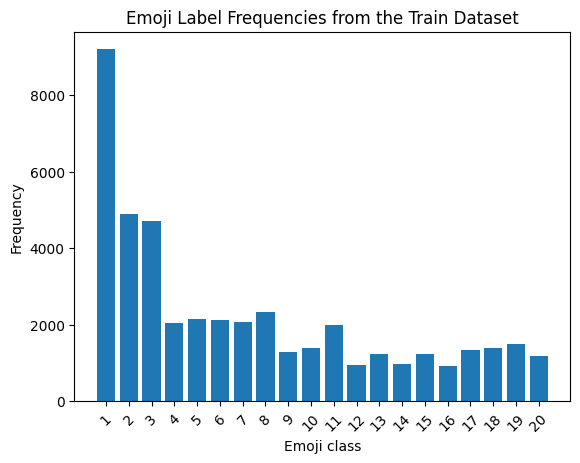

In [107]:
labels = load_labels_as_dict("./dataset/train_labels.txt")
plot_histogram(labels)

# Tweet Input

These functions are used to load all tweets from a given text file and apply some rough preprocessing.

In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re


def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result


def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def remove_whitespace(text):
    return " ".join(text.split())


def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    cleaned_text = [word for word in filtered_text if word != '️']
    for idx, word in enumerate(cleaned_text):
        word = word.replace('…', '')
        cleaned_text[idx] = word
    return cleaned_text


def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = remove_numbers(tweet)
    tweet = remove_punctuation(tweet)
    tweet = remove_whitespace(tweet)
    tweet = remove_stopwords(tweet)
    return tweet


def load_text(file_name):
    tweets = []
    with open(file_name, 'r', encoding='utf-8') as file:
        for tweet in file:
            tweet = preprocess_tweet(tweet)
            tweets.append(tweet)
    return tweets

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\catal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Normalization (min-max scaling for now)

In [43]:
def minmax_scaling(array2d, minval, maxval):
    for array in array2d:
        array = (array - minval)/(maxval - minval)
    return array2d

# t-SNE

Embedding words as vectors using `Word2Vec`, then applying t-SNE and plotting the results.

In [79]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import pandas as pd
import matplotlib.pyplot as plt

    # Load training set of tweets and apply Word2Vec
tweets = load_text("./dataset/train_text.txt")
print(tweets[0])
model = Word2Vec(tweets, min_count=1)

    # Select embeddings
word_embeddings = model.wv[model.wv.key_to_index]

    # Normalization
bounds: [int] = [0, 0]
for embedding in word_embeddings:
    bounds[0] = min(embedding) if min(embedding) < bounds[0] else bounds[0]
    bounds[1] = max(embedding) if max(embedding) > bounds[1] else bounds[1]

word_embeddings_norm = minmax_scaling(word_embeddings, bounds[0], bounds[1])

['sunday', 'afternoon', 'walking', 'venice', 'sun', 'user', 'abbot', 'kinney', 'venice']


In [75]:
words_embedded_tsne = TSNE(
    n_components = 2,          # 2D output
    perplexity = 40,           # higher than default, as dataset is large
    learning_rate = 'auto',    # same as default
    n_iter = 2000,             # more iterations than default
    random_state = 0,          # no randomness
    n_jobs = -1                # use all available processors for computation
).fit_transform(word_embeddings_norm)
df = pd.DataFrame(data = words_embedded_tsne, columns = ["Dimension_1", "Dimension_2"])

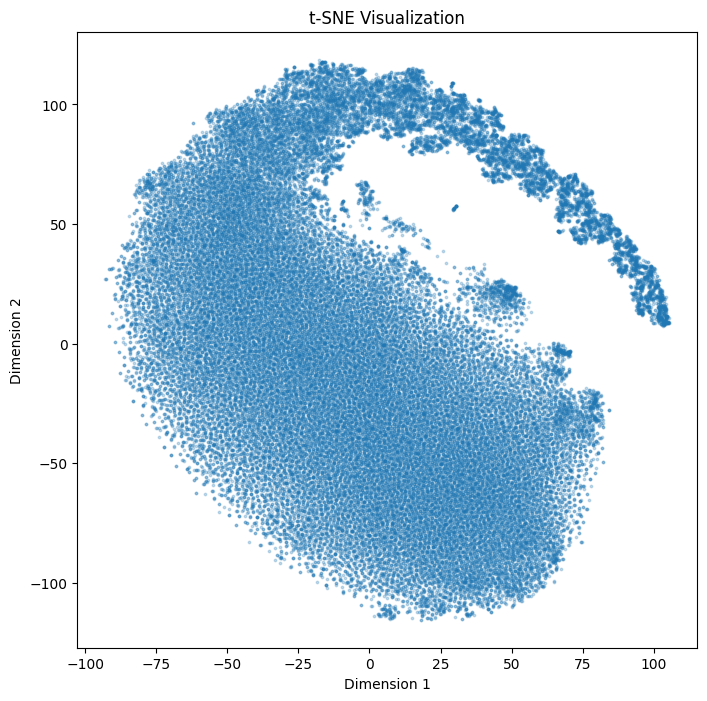

In [89]:
plt.figure(figsize = (8, 8))
plt.scatter(df["Dimension_1"], df["Dimension_2"], s = 3, alpha = 0.25)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.savefig('tSNE_adjusted.png')